**Experiment #1**

**The central question of this experiment is: how will changes in the sample size affect the AUCs, while the class balance remains constant? To investigate this, we will vary the `number_of_objects` in a range from 1E+5 to 5E+7, with `class_weight` set at 40% and 0.05%.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 11
rcParams['font.family'] = 'sans-serif'
rcParams['legend.fontsize'] = 11
rcParams['axes.labelpad'] = 11
rcParams['axes.labelsize'] = 11
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['xtick.labelsize'] = 11

In [2]:
from numpy import __version__
print('numpy: {}'.format(__version__))
from sklearn import __version__
print('sklearn: {}'.format(__version__))

numpy: 1.24.1
sklearn: 1.2.0


In [3]:
from utils import get_sample, get_metrics, seeds, class_weights, number_of_objects, get_curves, plot_curves

In [4]:
seeds

[978,
 672,
 821,
 445,
 488,
 449,
 753,
 962,
 874,
 287,
 257,
 598,
 100,
 136,
 305,
 376,
 548,
 229,
 265,
 425]

In [5]:
class_weights

[0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]

In [6]:
number_of_objects

array([  100000.,   200000.,   400000.,   800000.,  1000000.,  2000000.,
        4000000.,  8000000., 10000000., 15000000., 20000000., 25000000.,
       30000000., 35000000., 40000000., 45000000., 50000000.])

In [7]:
def get_results(class_weight):
    """Get maximum, minimum and mean AUCs
    for the specific `class_weight` and `n_objects`.
    """
    out = {
        'ROC': {'max': [], 'min': [], 'mean': []},
        'PR': {'max': [], 'min': [], 'mean': []},
    }

    for n_objects in number_of_objects:
        print('{:.1E} #'.format(n_objects), end='')
        roc_scores, pr_scores = [], []
        for seed in seeds:
            print('-', end='')
            roc, pr = get_metrics(
                get_sample(n_objects, class_weight, seed)
            )
            roc_scores.append(roc)
            pr_scores.append(pr)
        #
        out['ROC']['max'].append(max(roc_scores))
        out['ROC']['min'].append(min(roc_scores))
        out['ROC']['mean'].append(np.mean(roc_scores))
        #
        out['PR']['max'].append(max(pr_scores))
        out['PR']['min'].append(min(pr_scores))
        out['PR']['mean'].append(np.mean(pr_scores))
        #
        print()
        #
    return out

In [8]:
def plot(out):
    figure, axis = plt.subplots(1, 2, figsize=(14, 7))
    #
    for idx, metric in enumerate(('ROC', 'PR')):
        axis[idx].fill_between(range(len(number_of_objects)), y1=out[metric]['max'], y2=out[metric]['min'], alpha=0.2, color='silver')
        axis[idx].plot(range(len(number_of_objects)), out[metric]['mean'], 'ko--', lw=1.3, mfc='white')
        axis[idx].grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
        axis[idx].set_ylabel('AUC {}'.format(metric))
        axis[idx].set_xlabel('Number of objects')
        axis[idx].set_xticks(range(len(number_of_objects)))
        _ = axis[idx].set_xticklabels(['{:.1E}'.format(noo) for noo in number_of_objects], rotation=45)
    plt.tight_layout(pad=2)

# `class_weight` = 40% 

1.0E+05 #--------------------
2.0E+05 #--------------------
4.0E+05 #--------------------
8.0E+05 #--------------------
1.0E+06 #--------------------
2.0E+06 #--------------------
4.0E+06 #--------------------
8.0E+06 #--------------------
1.0E+07 #--------------------
1.5E+07 #--------------------
2.0E+07 #--------------------
2.5E+07 #--------------------
3.0E+07 #--------------------
3.5E+07 #--------------------
4.0E+07 #--------------------
4.5E+07 #--------------------
5.0E+07 #--------------------


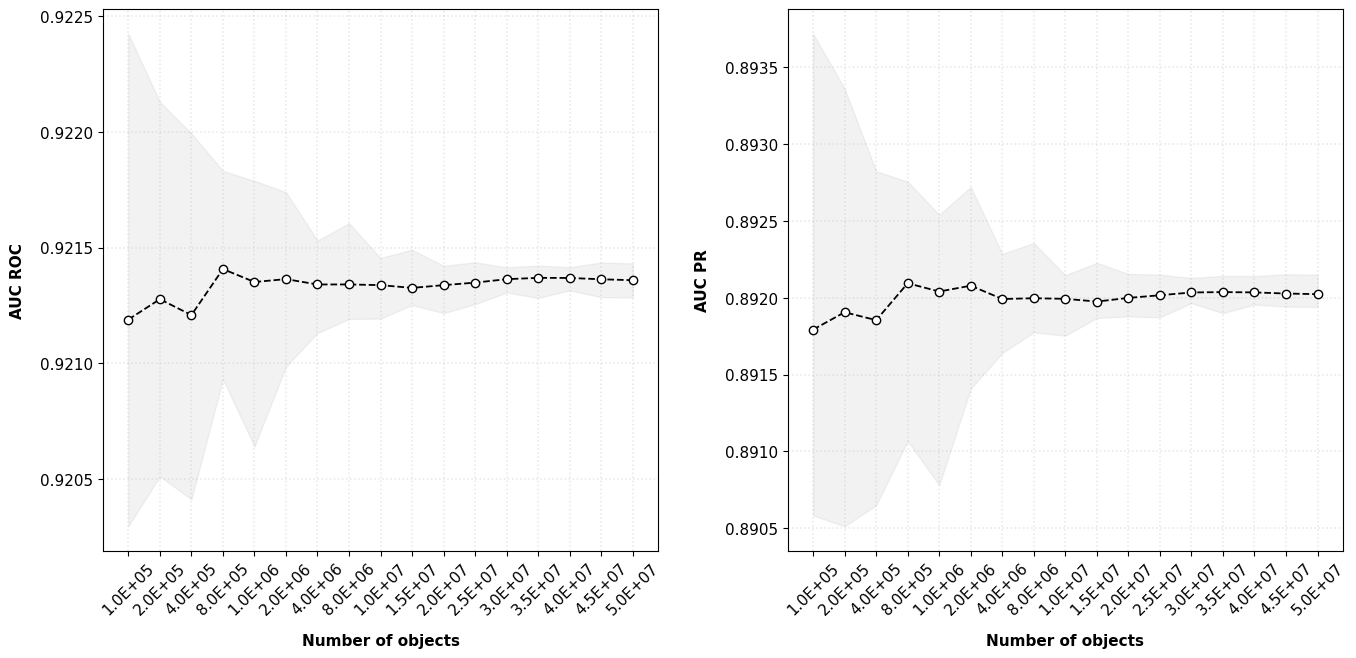

In [9]:
plot(get_results(class_weight=0.4))
plt.savefig('figures/fig3.png', dpi=300)

## Assessment the difference between the curves

**Let's compare the ROC and PR curves when `n_objects` is set to 1E+5 and `class_weight` is set to 40% at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

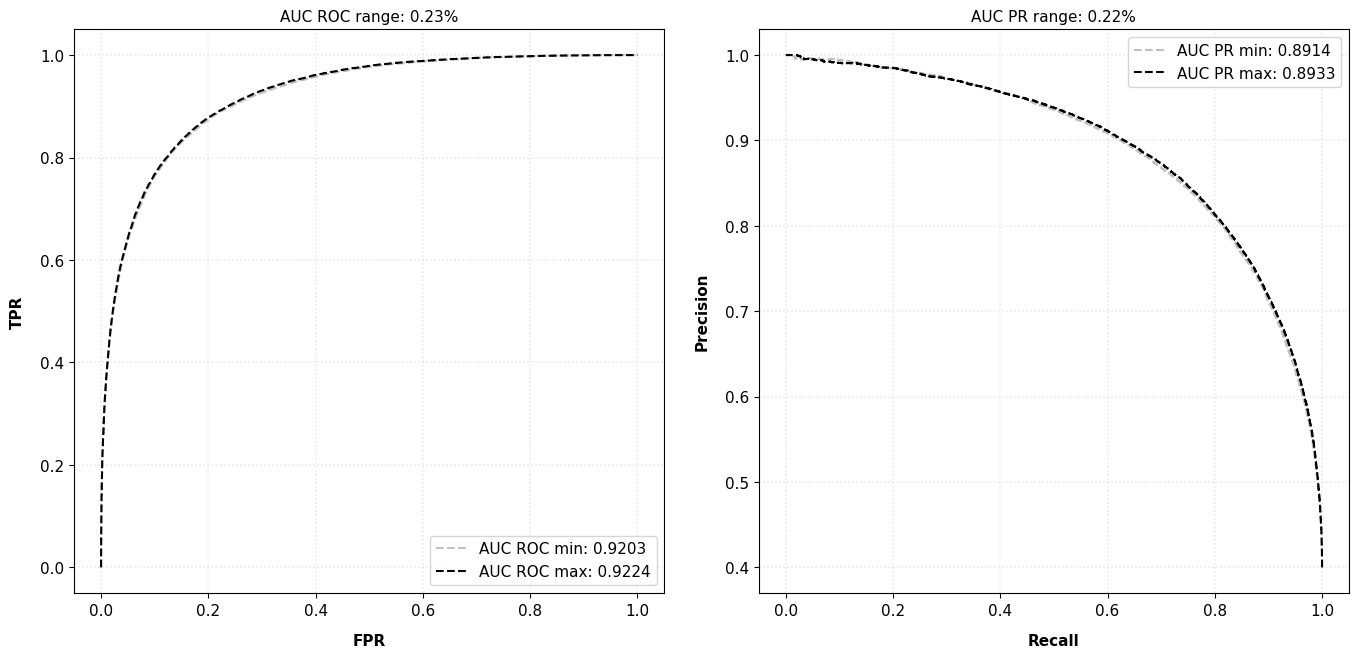

In [10]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.4))
plt.savefig('figures/fig4.png', dpi=300)

# `class_weight` = 0.05%

1.0E+05 #--------------------
2.0E+05 #--------------------
4.0E+05 #--------------------
8.0E+05 #--------------------
1.0E+06 #--------------------
2.0E+06 #--------------------
4.0E+06 #--------------------
8.0E+06 #--------------------
1.0E+07 #--------------------
1.5E+07 #--------------------
2.0E+07 #--------------------
2.5E+07 #--------------------
3.0E+07 #--------------------
3.5E+07 #--------------------
4.0E+07 #--------------------
4.5E+07 #--------------------
5.0E+07 #--------------------


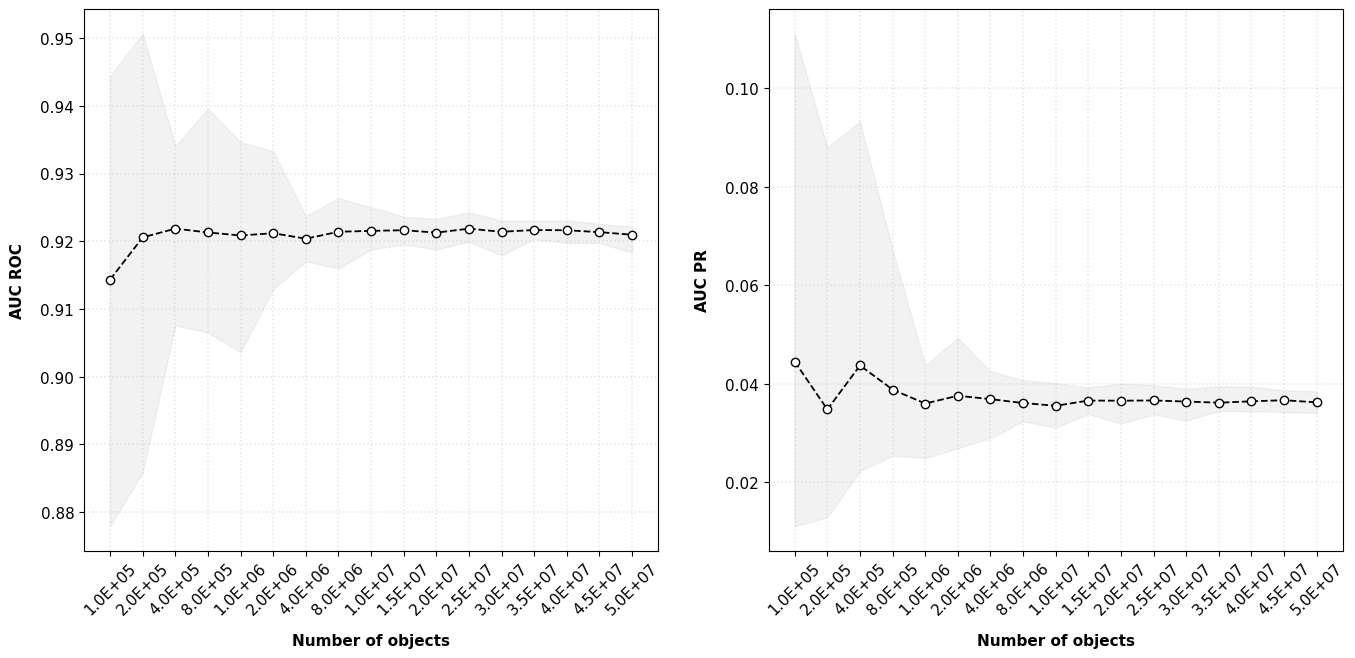

In [11]:
plot(get_results(class_weight=0.0005))
plt.savefig('figures/fig5.png', dpi=300)

## Assessment the difference between the curves

**Let's compare the ROC and PR curves when `n_objects` is set to 1E+5 and `class_weight` is set to 0.05% at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

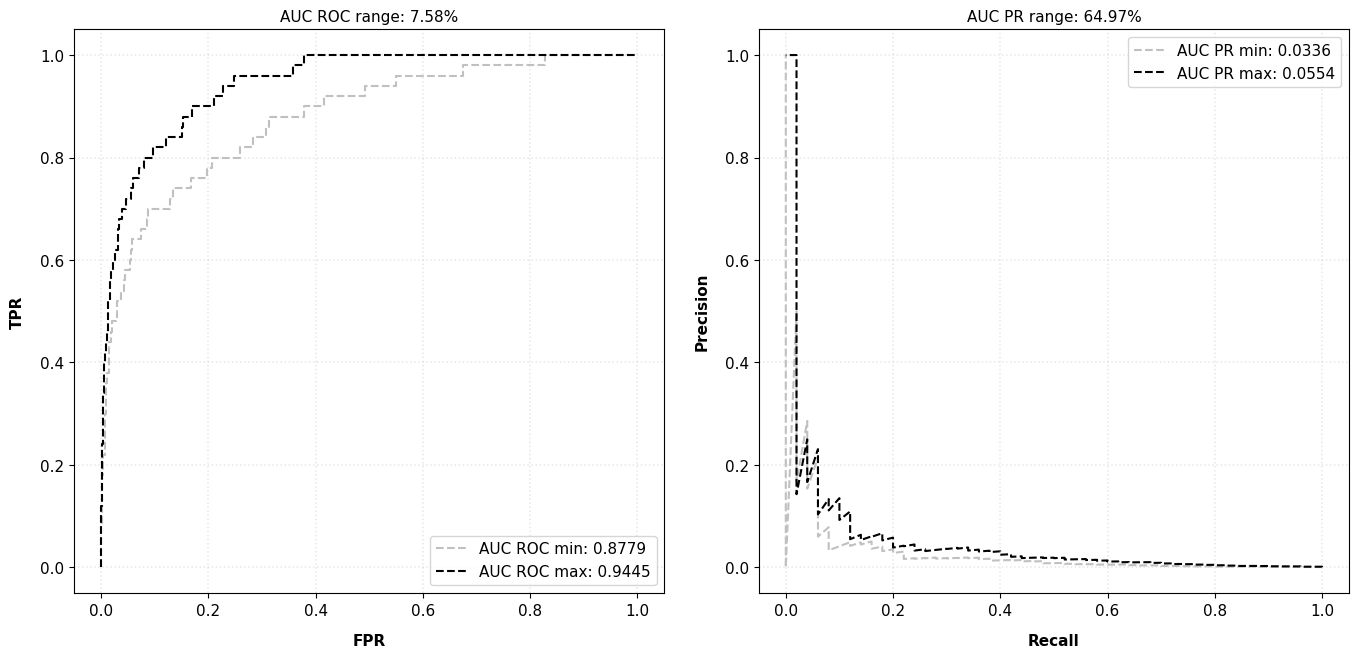

In [12]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.0005))
plt.savefig('figures/fig6.png', dpi=300)

**Let's do a similar comparison for `n_objects` equal to 5E+7.**

--------------------

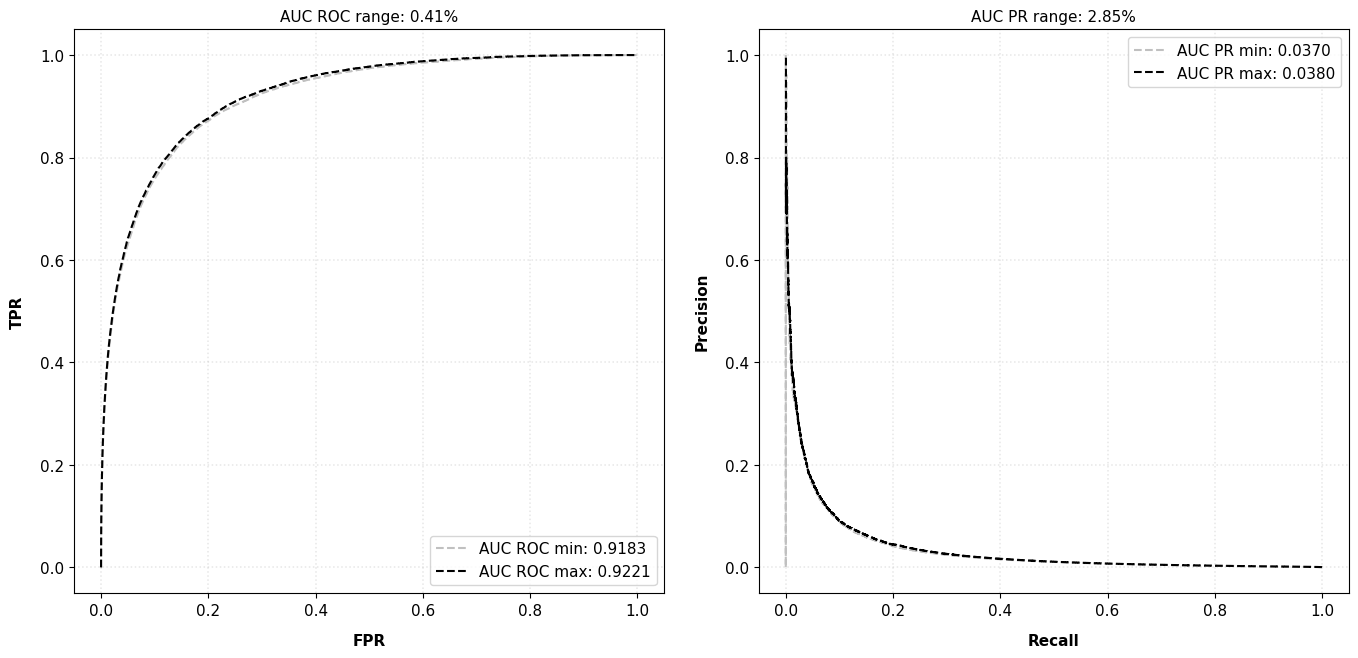

In [13]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.0005))
plt.savefig('figures/fig7.png', dpi=300)